# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
data = pd.read_csv('hasil_clustering.csv')
data

,Hours_Studied,Attendance,Motivation_Level,Exam_Score,Cluster
0,23,84,1,67,0
1,19,64,1,61,2
2,24,98,2,74,1
3,29,89,2,71,1
4,19,92,2,70,1
...,...,...,...,...,...
6243,25,69,2,68,2
6244,23,76,2,69,1
6245,20,90,1,68,0
6246,10,86,0,68,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# 2. Menyiapkan fitur dan target
X = data.drop(columns=['Cluster'])  # Semua kolom selain 'Cluster' sebagai fitur
y = data['Cluster']  # Kolom 'Cluster' sebagai target

# 3. Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Melakukan normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# 5. Membuat model klasifikasi (contoh menggunakan RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 6. Melakukan prediksi
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 2, 1, ..., 0, 2, 0])

Algoritma yang saya gunakan adalah Random Forest Classifier, karena algoritma ini unggul dalam menangani data dengan kombinasi jenis fitur ini karena setiap pohon keputusan secara otomatis memilih fitur penting selama proses split. Oleh karena itu, Random Forest tidak sensitif terhadap fitur-fitur tertentu yang kurang berkontribusi.Dan juga metode ini sangat baik untuk mencegah overfitting. Karenanya saya menggunakan metode ini untuk data yang saya miliki.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9880
F1-Score: 0.9880
Precision: 0.9881 
Recall: 0.9880


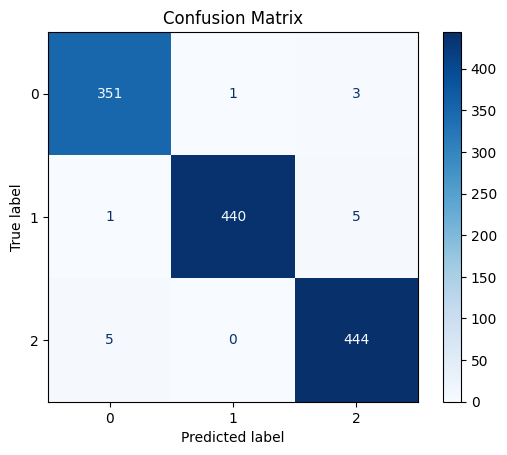

In [ ]:
# 7. Evaluasi hasil klasifikasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Precision: {precision:.4f} ')
print(f'Recall: {recall:.4f}')

# 8. Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Evaluasi per cluster:
              precision    recall  f1-score   support

   Cluster 0       0.98      0.99      0.99       355
   Cluster 1       1.00      0.99      0.99       446
   Cluster 2       0.98      0.99      0.99       449

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



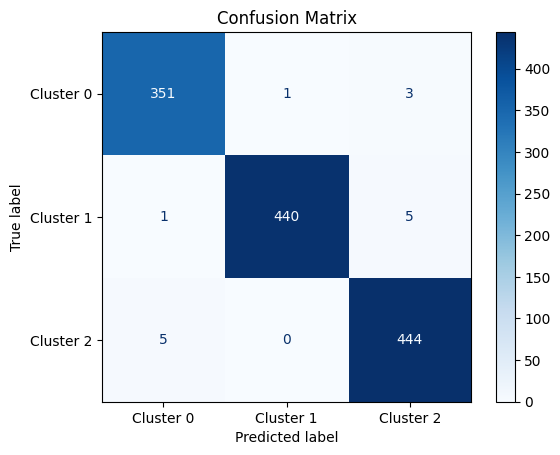

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluasi model
print("Evaluasi per cluster:")
# Pastikan y_test dan y_pred sudah didefinisikan sebelumnya
report = classification_report(
    y_test,
    y_pred,
    target_names=[f'Cluster {i}' for i in sorted(data['Cluster'].unique())]
)
print(report)

# 2. Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[f'Cluster {i}' for i in sorted(data['Cluster'].unique())]
)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 1. Evaluasi pada Training Set
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# 2. Evaluasi pada Test Set
y_test_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# 3. Cetak hasil evaluasi
print("Evaluasi Model:")
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")

Evaluasi Model:
Train Accuracy: 1.0000, Test Accuracy: 0.9880
Train F1-Score: 1.0000, Test F1-Score: 0.9880


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Hasil evaluasi model yang ditunjukkan oleh algoritma random forest classifier sudah sangat baik untuk menangani data hasil clustering yang saya miliki. Dengan nilai klasifikasinya berada pada angka 0.9880 atau 99.80% yang menunjukkan bahwa performa algoritma tersebut sangat cocok dengan data. Lalu, tidak terjadi overfitting atau underfitting pada model yang saya gunakan, dan juga distribusi nilai evaluasi model tidak jauh berbeda pada setiap cluster, semua nilai evaluasi menunjukkan hasil yang sangat baik dan signifikan dan tidak jauh berbeda antara nilai cluster satu dengan cluster lainnya. Jadi, tidak perlu dilakukan tindakan lanjutan.